In [1]:
# Importing important libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
from math import sqrt
from scipy import stats
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
# Reading the CSV file with Pandas
# Dataset link = https://catalog.data.gov/dataset/2018-green-taxi-trip-data

df = pd.read_csv("../data/2018_Green_Taxi_Trip_Data.csv", skipinitialspace=True, usecols=['trip_distance', 'total_amount'])

print(df.head())

   trip_distance  total_amount
0           0.70           7.3
1           3.50          15.8
2           2.14          11.3
3           0.03          -4.3
4           0.03           4.3


In [3]:
# Removing the null values
df.dropna(how = 'any')

# Removing negative and zero values
df = df[(df['trip_distance'] > 0)]
df = df[(df['total_amount'] > 0)]

print(df)

         trip_distance  total_amount
0                 0.70           7.3
1                 3.50          15.8
2                 2.14          11.3
4                 0.03           4.3
5                 5.63          22.3
...                ...           ...
8807296           7.20          23.3
8807297           2.40          11.3
8807298           0.60           6.3
8807299           2.80          14.3
8807300           1.49           8.3

[8675258 rows x 2 columns]


In [4]:
# Finding the z score and removing outliers
z_scores = stats.zscore(df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 1).all(axis=1)
df = df[filtered_entries]

In [5]:
# Storing the required column in variables
X = df['trip_distance']
Y = df['total_amount']

0          0.70
1          3.50
2          2.14
4          0.03
5          5.63
           ... 
8807296    7.20
8807297    2.40
8807298    0.60
8807299    2.80
8807300    1.49
Name: trip_distance, Length: 7662382, dtype: float64
0           7.3
1          15.8
2          11.3
4           4.3
5          22.3
           ... 
8807296    23.3
8807297    11.3
8807298     6.3
8807299    14.3
8807300     8.3
Name: total_amount, Length: 7662382, dtype: float64


In [6]:
# Reshaping the data into required array format
X = X.values.reshape(len(X),1)
Y = Y.values.reshape(len(Y),1)

[[0.7 ]
 [3.5 ]
 [2.14]
 ...
 [0.6 ]
 [2.8 ]
 [1.49]]
[[ 7.3]
 [15.8]
 [11.3]
 ...
 [ 6.3]
 [14.3]
 [ 8.3]]


In [7]:
# Creating the object of kFold and Linear Regression Model
kfold = KFold(n_splits=10)
LR_model = linear_model.LinearRegression()

# Calculating the R-squared for the model
results = cross_val_score(LR_model, X, Y, cv=kfold, scoring='r2')
print("R-squared: %.3f ( SD: %.3f )" % (results.mean(), results.std()))

R-squared: 0.832 ( SD: 0.012 )


In [8]:
# Calculating the Negative Mean Absoulate Error for the model
results = cross_val_score(LR_model,X,Y, cv=kfold, scoring='neg_mean_absolute_error')
print("Negative Mean Absoulate Error: %.3f ( SD: %.3f )" % (results.mean(), results.std()))

Negative Mean Absoulate Error: -1.676 ( SD: 0.054 )


In [9]:
# Calculating the Negative Mean Square Error for the model
results = cross_val_score(LR_model,X,Y, cv=kfold, scoring='neg_mean_squared_error')
print("Negative Mean Square Error: %.3f ( SD: %.3f )" % (results.mean(), results.std()))

Negative Mean Square Error: -5.387 ( SD: 0.446 )


In [10]:
# Spit features and label in train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.0001, random_state=0)

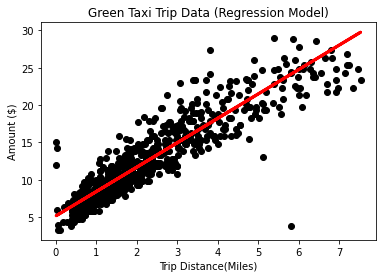

In [11]:
# Plot outputs MatPlotLib
plt.scatter(X_test, Y_test,  color='black')
plt.title('Green Taxi Trip Data (Regression Model)')
plt.xlabel('Trip Distance(Miles)')
plt.ylabel('Amount ($)')

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Predict using testing set
Y_pred = regr.predict(X_test)

# Plot outputs
plt.plot(X_test, Y_pred, color='red',linewidth=3)
plt.show()

In [12]:
#Intercept of our model
print('Intercept', regr.intercept_)

#Slope of our model
print('Slope', regr.coef_)

Intercept [5.1621418]
Slope [[3.26358286]]


In [13]:
# Calculating Mean Absolute Error
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  

# Calculating Mean Square Error
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  

# Calculating Root Mean Squared Error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 1.643856682863611
Mean Squared Error: 5.149155840495718
Root Mean Squared Error: 2.269175145398812
